In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# shifts an numpy array left and right to effectively reduce the number of used bits
def reduce_res(data, num_bitshifts):
    return np.left_shift(np.right_shift(data, num_bitshifts), num_bitshifts)

# Generate an image for a given pixel line (e.g. the color scale)
# the step size is down-sampled by the number of "base_resolution_bitshifts"
def generate_img_for_base(pixel_line, base_resolution_bitshifts, num_lines=10):
    reducer_indexes = reduce_res(np.arange(0, 256, dtype=np.uint8), base_resolution_bitshifts)
    img_list = [pixel_line[reducer_indexes] for row in range(num_lines)]
    full_img = np.asarray((img_list,), dtype=np.uint8)[0]
    return full_img

In [6]:
# get the kindlmann color table for 8-bit input and save as numpy matrix
#color_pallet_df = pd.read_csv("bent-cool-warm-table-byte-0256.csv")
color_pallet_df = pd.read_csv("black-body-table-byte-0256.csv")
#color_pallet_df = pd.read_csv("extended-black-body-table-byte-0256.csv")
#color_pallet_df = pd.read_csv("kindlmann-table-byte-0256.csv")
color_pallet_df = pd.read_csv("extended-kindlmann-table-byte-0256.csv")
color_pallet = color_pallet_df.drop('scalar', axis=1).as_matrix()

# create a 8-bit gray line
gray_line = np.arange(0, 256*3, dtype=np.uint8).reshape(256, 3, order='F')

/home/hwp1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


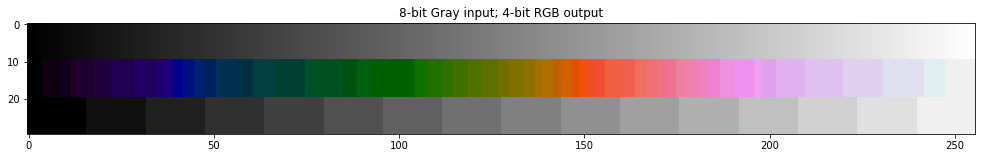

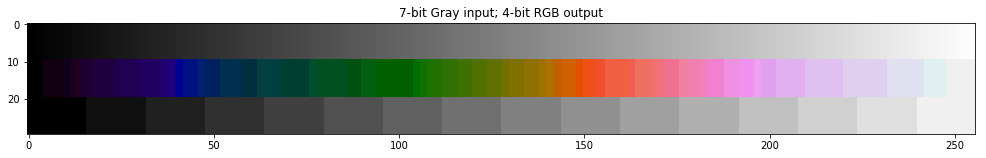

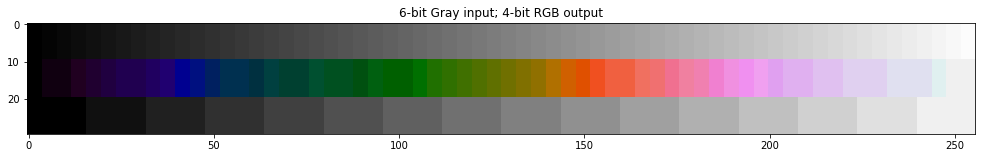

In [15]:
input_shifts = 2
output_shifts = 4

for input_shifts in range(3):
    # generate images for the given number of input and output bitshifts
    input_gray_img = generate_img_for_base(gray_line, input_shifts)
    output_color_img = reduce_res(generate_img_for_base(color_pallet, input_shifts), output_shifts)
    output_gray_img = reduce_res(generate_img_for_base(gray_line, input_shifts), output_shifts)

    # combine the resulting color schemes into one image
    combined_img = np.append(input_gray_img, output_color_img, axis=0)
    combined_img = np.append(combined_img, output_gray_img, axis=0)

    # plot the stuff
    fig = plt.gcf()
    fig.set_size_inches(17, 10)
    plt.imshow(combined_img)
    plt.title("{:d}-bit Gray input; {:d}-bit RGB output".format(8-input_shifts, 8-output_shifts))
    plt.show()

In [56]:
# Example: tmp(addr_pos) := std_logic_vector(to_unsigned(addr_pos, DATA_WIDTH));
rom_output = ""
input_vals = np.right_shift(input_gray_img[0][...,0], 2)
output_vals = np.right_shift(output_color_img[0], 4)
for i in range(0, len(input_vals), 4):
    msg = "tmp({:.0f}) := std_logic_vector(".format(i/4)
    bit_string = ""
    for j in range(3):
        bit_string += "{:04d}".format(int(np.binary_repr(output_vals[i][j])))
    msg += '"{:}");'.format(bit_string)
    rom_output += msg + os.linesep
with open("rom_input.txt", 'w') as f:
    f.write(rom_output)
print(rom_output)

tmp(0) := std_logic_vector("000000000000");
tmp(1) := std_logic_vector("000100000001");
tmp(2) := std_logic_vector("000100000001");
tmp(3) := std_logic_vector("001000000010");
tmp(4) := std_logic_vector("001000000011");
tmp(5) := std_logic_vector("001000000100");
tmp(6) := std_logic_vector("001000000101");
tmp(7) := std_logic_vector("001000000101");
tmp(8) := std_logic_vector("001000000110");
tmp(9) := std_logic_vector("001000000111");
tmp(10) := std_logic_vector("000000001001");
tmp(11) := std_logic_vector("000000011000");
tmp(12) := std_logic_vector("000000100110");
tmp(13) := std_logic_vector("000000110101");
tmp(14) := std_logic_vector("000000110101");
tmp(15) := std_logic_vector("000000110100");
tmp(16) := std_logic_vector("000001000100");
tmp(17) := std_logic_vector("000001000011");
tmp(18) := std_logic_vector("000001000011");
tmp(19) := std_logic_vector("000001010011");
tmp(20) := std_logic_vector("000001010010");
tmp(21) := std_logic_vector("000001010010");
tmp(22) := std_logic